# Point cloud classification with Pointnet using Keras


## Introduction

Classification, detection and segmentation of unordered 3D point sets i.e. point clouds
is a core problem in computer vision. This example implements the seminal point cloud
deep learning paper [PointNet (Qi et al., 2017)](https://arxiv.org/abs/1612.00593). 


## Setup

If using colab first install trimesh with `!pip install trimesh`.


In [1]:
# !pip install tensorflow
# !pip install seaborn

In [34]:
# !pip install trimesh
import os
# import glob
# import trimesh
# import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from keras import callbacks

from DataSetsLoader import DataSetsLoader
from PointNetFactory import PointNetFactory

tf.random.set_seed(123)


## Load dataset

We use the ModelNet10 model dataset, the smaller 10 class version of the ModelNet40
dataset. First download the data:


In [3]:
# DATA_DIR = tf.keras.utils.get_file(
#     "modelnet.zip",
#     "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
#     extract=True,
# )
# DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")


We can use the `trimesh` package to read and visualize the `.off` mesh files.


In [4]:
# mesh = trimesh.load(os.path.join(DATA_DIR, "chair/train/chair_0001.off"))
# mesh.show()


To convert a mesh file to a point cloud we first need to sample points on the mesh
surface. `.sample()` performs a unifrom random sampling. Here we sample at 2048 locations
and visualize in `matplotlib`.


In [5]:
# points = mesh.sample(2048)

# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111, projection="3d")
# ax.scatter(points[:, 0], points[:, 1], points[:, 2])
# ax.set_axis_off()
# plt.show()


To generate a `tf.data.Dataset()` we need to first parse through the ModelNet data
folders. Each mesh is loaded and sampled into a point cloud before being added to a
standard python list and converted to a `numpy` array. We also store the current
enumerate index value as the object label and use a dictionary to recall this later.


In [6]:
NUM_POINTS = 4096
NUM_CLASSES = 3
BATCH_SIZE = 32

In [7]:
import numpy as np
import pandas as pd

# # def transform_to_tensorflow_dataset(self, split_size=0.7):
# points = []
# labels = []
# #     os.chdir(r"/workspace/Storage_fast/Project_PointNet/datafolder")                       
# try:
#     data = pd.read_csv(r"/workspace/Storage_fast/Project_PointNet/building_01_1.txt", skiprows=[0], sep=" ")
#     print(data)
#     if (len(data)>=NUM_POINTS):
#         points.append(data.sample(NUM_POINTS))
#         labels.append(1)
# except Exception as e:
#         print(e)

In [8]:
os.getcwd() 
os.listdir("/mnt/Z6Vs-project1")

['.Trash-1000',
 '.ipynb_checkpoints',
 'Vegetation_02_tree_02.txt',
 'Vegetation_02_tree_03.txt',
 'Vegetation_02_tree_04.txt',
 'Vegetation_02_tree_05.txt',
 'Vegetation_02_tree_06.txt',
 'Vegetation_02_tree_12_59.txt',
 'Vegetation_02_tree_14.txt',
 'Vegetation_02_tree_15.txt',
 'Vegetation_02_tree_18.txt',
 'Vegetation_02_tree_19.txt',
 'Vegetation_02_tree_20.txt',
 'Vegetation_02_tree_21_53.txt',
 'Vegetation_02_tree_22_54.txt',
 'Vegetation_02_tree_23_55.txt',
 'Vegetation_02_tree_24_56.txt',
 'Vegetation_02_tree_25_57.txt',
 'Vegetation_02_tree_26_58.txt',
 'Vegetation_02_tree_27_50.txt',
 'Vegetation_02_tree_28.txt',
 'Vegetation_02_tree_29.txt',
 'Vegetation_02_tree_30.txt',
 'Vegetation_02_tree_31.txt',
 'Vegetation_02_tree_32.txt',
 'Vegetation_02_tree_34.txt',
 'Vegetation_02_tree_35.txt',
 'Vegetation_02_tree_36.txt',
 'Vegetation_02_tree_37.txt',
 'Vegetation_02_tree_38.txt',
 'Vegetation_02_tree_39.txt',
 'Vegetation_02_tree_40.txt',
 'Vegetation_02_tree_41_42.txt',
 'Ve

In [9]:
# all_files = os.listdir("/mnt/Z6Vs-project1/")
# data_files = list(filter(lambda file: file.endswith('.txt'), all_files))
# # shuffle(data_files)
# for f in data_files: 
#     os.chdir(r"/mnt/Z6Vs-project1/")                       
#     try:
#         data = pd.read_csv(f, sep=" ")
#         # print(np.isnan(data))
#         # print(data.isnull().values.any())
#         data = data.fillna(method='ffill').fillna(method='bfill')
#         print(data.isnull().values.any())
#     except Exception as e:
#         print(e)

In [10]:
# Load Datasets
datasets_loader = DataSetsLoader(NUM_POINTS,NUM_CLASSES)
train_points, test_points, val_points, train_labels, test_labels, val_labels = datasets_loader.transform_to_tensorflow_dataset()

/mnt/Z6Vs-project1


In [11]:
import math
# print(train_points)
# print(math.isnan(train_points))
# for i in train_points:
#     print("first step")
#     np.isnan(i)
# np.isnan(np.min(train_points))
    # print(train_points)
    # numpy.isnan(a).any()
# print(train_labels)
# print(val_points)

np.argwhere(np.isnan(train_points))
# list(map(tuple, np.where(np.isnan(train_points))))

array([], shape=(0, 3), dtype=int64)

In [12]:
def label_mapping(lbl):
    if(lbl.lower() == 'b'):
        return 0
    if(lbl.lower() == 'g'):
        return 1
    if(lbl.lower() == 'v'):
        return 2
    else:
        return None

In [13]:
train_label=[]
test_label=[]
val_label=[]
for i in train_labels:
    label_train = label_mapping(i.lower())
    if(label_train!=None):
#         train_label.append(int(label_train))
        train_label.append(label_train)
        
for j in test_labels:  
    label_tst = label_mapping(j.lower())
    if(label_tst!=None):
        test_label.append(label_tst)

for k in val_labels:  
    label_val = label_mapping(k.lower())
    if(label_val!=None):
        val_label.append(label_val)
# train_label = tf.one_hot(train_label, depth=3)       
# test_label = tf.one_hot(test_label, depth=3)
print(train_label)    
print(test_label)
print(val_label)    

[2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 

Set the number of points to sample and batch size and parse the dataset. This can take
~5minutes to complete.


In [14]:
# NUM_POINTS = 2048
# NUM_CLASSES = 3
# BATCH_SIZE = 32

# train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
#     NUM_POINTS
# )


Our data can now be read into a `tf.data.Dataset()` object. We set the shuffle buffer
size to the entire size of the dataset as prior to this the data is ordered by class.
Data augmentation is important when working with point cloud data. We create a
augmentation function to jitter and shuffle the train dataset.


In [15]:

def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_label))
val_dataset = tf.data.Dataset.from_tensor_slices((val_points, val_label))

# train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
# val_dataset = val_dataset.shuffle(len(val_points)).batch(BATCH_SIZE)
# test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = train_dataset.map(augment).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

2023-11-01 22:02:00.548195: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [16]:
for i,j in train_dataset:
    print(i)
    print(j)

tf.Tensor(
[[[  0.90636107   0.6636768    3.28896539]
  [  4.19794766   2.80006243   2.8367178 ]
  [  1.36558431   0.91575537   2.06424521]
  ...
  [  0.46705031   0.81308118   1.58276511]
  [  3.36465248   1.5426082    3.43498176]
  [  0.69438212   0.23781427   0.56495785]]

 [[ 32.13283648  21.11409679   1.82196268]
  [  4.6073275    3.54863398   1.75511671]
  [ 23.13894191  15.97460902   1.67033267]
  ...
  [ 33.88026999  13.88820305   1.70490579]
  [  8.18177308   7.67189649   1.67119833]
  [ 29.26134227  26.32413576   2.03485415]]

 [[103.70275149  59.4279222    2.67637713]
  [ 55.19842501  97.84712931   1.01083891]
  [ 41.00935791 107.19672307   0.83559499]
  ...
  [151.48100186  70.5323705    2.68068218]
  [ 66.14209343 103.1541829    1.19717405]
  [ 53.39242187 103.94297298   0.94758038]]

 ...

 [[  8.19157775  11.94834846  12.15339564]
  [  3.78060099   6.32223622  15.5293565 ]
  [  2.29249724   0.78238175   4.38209577]
  ...
  [  5.4922938    5.9617892   14.98339032]
  [  7.

### Build a model

Each convolution and fully-connected layer (with exception for end layers) consits of
Convolution / Dense -> Batch Normalization -> ReLU Activation.


In [17]:

def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.99)(x)
    # return layers.Activation("relu")(x)
    return layers.LeakyReLU(alpha=0.3)(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.99)(x)
    # return layers.Activation("relu")(x)
    return layers.LeakyReLU(alpha=0.3)(x)



PointNet consists of two core components. The primary MLP network, and the transformer
net (T-net). The T-net aims to learn an affine transformation matrix by its own mini
network. The T-net is used twice. The first time to transform the input features (n, 3)
into a canonical representation. The second is an affine transformation for alignment in
feature space (n, 3). As per the original paper we constrain the transformation to be
close to an orthogonal matrix (i.e. ||X*X^T - I|| = 0).


In [18]:

class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))



 We can then define a general function to build T-net layers, similar to fig: 
 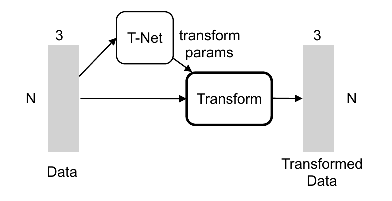

---




In [19]:

def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])



The main network can be then implemented in the same manner where the t-net mini models
can be dropped in a layers in the graph. Here we replicate the network architecture
published in the original paper but with half the number of weights at each layer as we
are using the smaller 10 class ModelNet dataset.


In [20]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Flatten()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()


Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 4096, 3)]            0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 4096, 32)             128       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 4096, 32)             128       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 leaky_re_lu (LeakyReLU)     (None, 4096, 32)             0         ['batch_normalization[0

In [21]:
# Train Model
initial_learning_rate = 0.0001    
decay_steps = 7000  #200000
decay_rate = 0.7
# MOMENTUM = 0.99
def get_learning_rate(initial_learning_rate,decay_steps, decay_rate):
    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps, decay_rate, staircase=False, name=None)
    return learning_rate 

### Train model

Once the model is defined it can be trained like any other standard classification model
using `.compile()` and `.fit()`.


In [37]:
model.compile(
    loss="sparse_categorical_crossentropy",
    # optimizer=keras.optimizers.Adam(learning_rate=0.001),
    optimizer=keras.optimizers.Adam(get_learning_rate(initial_learning_rate,decay_steps, decay_rate)),
    metrics=["sparse_categorical_accuracy"],
)

es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, start_from_epoch = 100, patience = 3)
# mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history = model.fit(train_dataset, epochs=300, validation_data=val_dataset) #, callbacks = [es,mc])


Epoch 1/300
12/12 [==============================] - 43s 3s/step - loss: 1.1648 - sparse_categorical_accuracy: 0.9740 - val_loss: 3.1333 - val_sparse_categorical_accuracy: 0.6846
Epoch 2/300
12/12 [==============================] - 36s 3s/step - loss: 1.1963 - sparse_categorical_accuracy: 0.9740 - val_loss: 2.1103 - val_sparse_categorical_accuracy: 0.7538
Epoch 3/300
12/12 [==============================] - 36s 3s/step - loss: 1.2195 - sparse_categorical_accuracy: 0.9714 - val_loss: 2.8334 - val_sparse_categorical_accuracy: 0.7692
Epoch 4/300
12/12 [==============================] - 36s 3s/step - loss: 1.1662 - sparse_categorical_accuracy: 0.9818 - val_loss: 2.3225 - val_sparse_categorical_accuracy: 0.7538
Epoch 5/300
12/12 [==============================] - 35s 3s/step - loss: 1.0909 - sparse_categorical_accuracy: 1.0000 - val_loss: 2.2397 - val_sparse_categorical_accuracy: 0.7308
Epoch 6/300
12/12 [==============================] - 36s 3s/step - loss: 1.0632 - sparse_categorical_accu

In [23]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


NotImplementedError: <__main__.OrthogonalRegularizer object at 0x7f97da5c2d60> does not implement get_config()

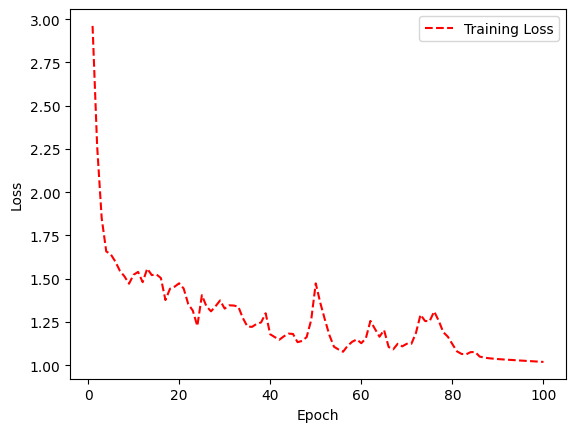

In [24]:
# Get training and test loss histories
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss)+1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
# plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

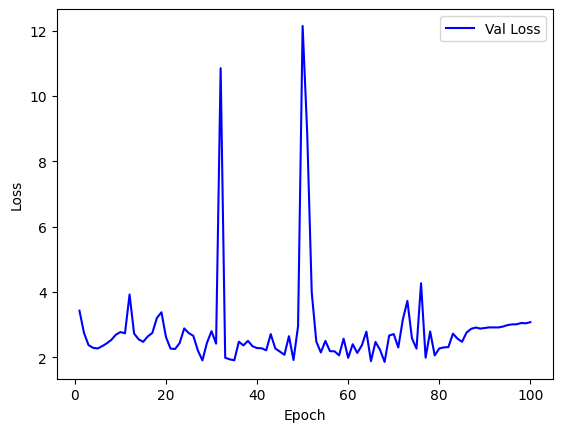

In [25]:
epoch_count = range(1, len(training_loss)+1)

# Visualize loss history
# plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

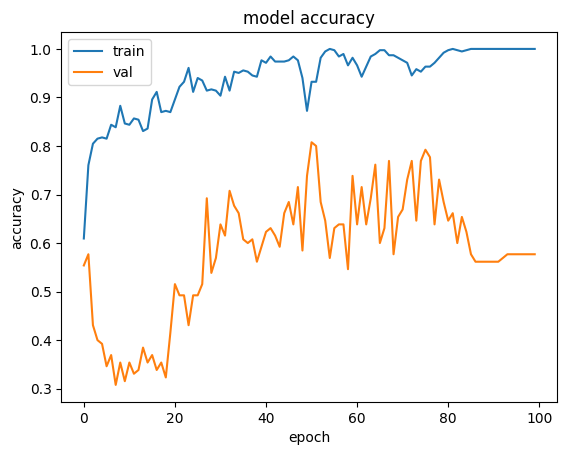

In [26]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Visualize predictions

We can use matplotlib to visualize our trained model performance.


1/1 [==============================] - 1s 660ms/step


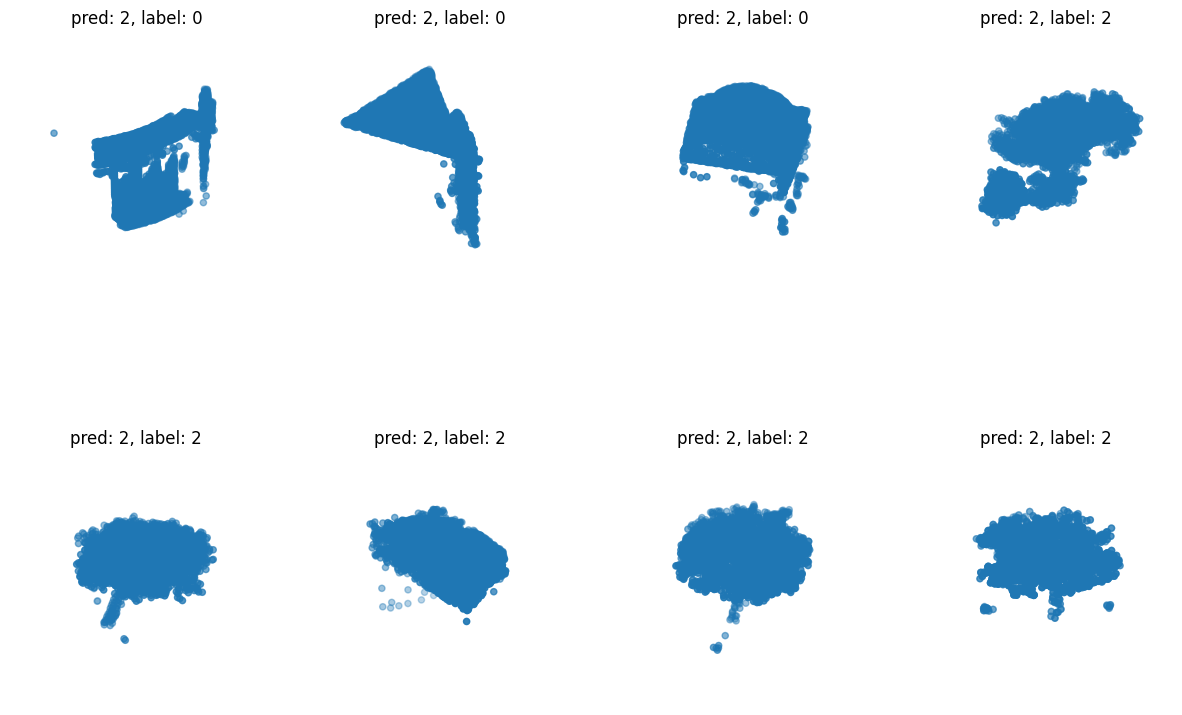

In [27]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
#             CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
            preds[i].numpy(),labels.numpy()[i]
        )
    )
    ax.set_axis_off()
plt.show()


In [28]:
dataset = test_dataset
total_count = 0
correct_count = 0
expected = []
predicted = []
accuracy_arr = []

for element in dataset.as_numpy_iterator():
    points = element[0]
    labels = element[1]
    pred = model.predict(points)
    pred = tf.math.argmax(pred, -1)
    for index, point in enumerate(points):
        pred = model.predict(points)
#         print("inside")
#         print(index)
# #         print(point)
#         print(labels[index])
#         print(pred[index])
        pred = tf.math.argmax(pred, -1)
#         print(pred)
        total_count += 1
        predicted.append(pred[index])
        expected.append(labels[index])
        if labels[index] == pred[index]:
            correct_count += 1
        
        accuracy  = correct_count / total_count
        print("Accuracy  is {}".format(accuracy))
        accuracy_arr.append(accuracy)
            
accuracy  = correct_count / total_count
print("Accuracy  is {}".format(accuracy))

1/1 [==============================] - 0s 444ms/step
Accuracy  is 0.0
1/1 [==============================] - 0s 437ms/step
Accuracy  is 0.0
1/1 [==============================] - 0s 438ms/step
Accuracy  is 0.0
1/1 [==============================] - 0s 454ms/step
Accuracy  is 0.25
1/1 [==============================] - 0s 444ms/step
Accuracy  is 0.4
1/1 [==============================] - 0s 447ms/step
Accuracy  is 0.5
1/1 [==============================] - 0s 462ms/step
Accuracy  is 0.5714285714285714
1/1 [==============================] - 1s 515ms/step
Accuracy  is 0.625
1/1 [==============================] - 0s 457ms/step
Accuracy  is 0.5555555555555556
1/1 [==============================] - 0s 454ms/step
Accuracy  is 0.6
1/1 [==============================] - 0s 448ms/step
Accuracy  is 0.6363636363636364
1/1 [==============================] - 0s 443ms/step
Accuracy  is 0.6666666666666666
1/1 [==============================] - 0s 460ms/step
Accuracy  is 0.6923076923076923
1/1 [=======

In [29]:
# epoch_count = range(1, total_count+1)

# plt.plot(epoch_count, accuracy_arr, 'b-')
# plt.legend(['Accuracy'])
# plt.xlabel('Epoch')
# plt.ylabel('accuracy')
# plt.show();

In [30]:
# for element in dataset.as_numpy_iterator():
#     print(element)
# confusion = tf.confusion_matrix(labels=labels, predictions=pred, num_classes=NUM_CLASSES)
# print(confusion)
# !pip install -U scikit-learn
# !pip install seaborn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [31]:
label_names = np.array(['building','ground','vegetation'])

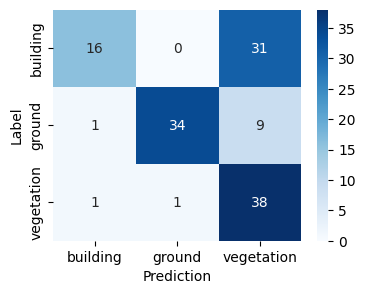

Accuracy: 0.671756
Precision: 0.671756
Recall: 0.671756
F1 score: 0.671756
              precision    recall  f1-score   support

    building       0.89      0.34      0.49        47
      ground       0.97      0.77      0.86        44
  vegetation       0.49      0.95      0.64        40

    accuracy                           0.67       131
   macro avg       0.78      0.69      0.67       131
weighted avg       0.79      0.67      0.66       131



In [32]:
confusion_mtx = tf.math.confusion_matrix(expected, predicted)
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g',cmap="Blues")
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

accuracy = accuracy_score(expected, predicted)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)  58/(58+6)  : was something else but predicted b,g,v
precision = precision_score(expected, predicted, average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)   58/(58+6)  : was b,g,v but predicted as something else
recall = recall_score(expected, predicted, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)  2*58/(2*58+6+6)
f1 = f1_score(expected, predicted, average='micro')
print('F1 score: %f' % f1)

print(classification_report(expected, predicted,target_names=label_names))


## Extra points

Check the following tuning params:


*   Number of points (e.g. 1024 or 512)
*   Learning rate
*   Batch size

Check the classification with Kaolin and custum dataset from [here](https://colab.research.google.com/drive/1DoBlEt0GyOF5ZGrZ0kf30Gp5wk-dV2X9?usp=sharing)!

